# 2. Choosing the right estimator/algorithm for your model

* SKlearn refers to ml models, algos as estimators
* Classification problem - predicting a category - heart disease or not
    * Sometimes `clf` is used as short for classification estimator
* Regression problem - predicting a number (selling price of a car)

If in doubt, refer the Scikit Learn map: https://scikit-learn.org/stable/machine_learning_map.html

# Housing along the Western Coast

The dataset reveals more than just numbers - it reflects the nuances of neighbourhoods, according to the differences and similarities in the people living in them.

Let us see what the analysis has to say 

Q: Can we accurately predict the median house value in different California districts based on features such as median income, population, and proximity to the ocean?

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

notice the keys 'target' and 'feature_names'    
we will use the features to predict the target

In [2]:
# Looking at the description of the dataset
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
print(f"Number of samples: {len(df)}")

Number of samples: 20640


In [6]:
print(housing['feature_names'],
      housing['target_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] ['MedHouseVal']


In [7]:
# Adding the target_names columns into the dataframe
df['MedHouseVal'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
import time
timings = {}

## Trying out an algorithm
### 1. Ridge Regression

In [9]:
from sklearn.linear_model import Ridge

np.random.seed(5)

# X and y
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal'] # median price of houses in multiples of $100,000

# test, train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate the model
start_timing = time.time()
model = Ridge()
model.fit(X_train, y_train)
end_timings = time.time()

# check the score
score = model.score(X_test, y_test)
time_taken = end_timings - start_timing

# print stats
print(f"score = {score}")
print(f"time taken = {time_taken} seconds")

score = 0.6112674533035537
time taken = 0.015544414520263672 seconds


In [10]:
model_scores = {}
model_scores['Ridge'] = model.score(X_test, y_test)
timings['Ridge'] = time_taken

In [11]:
print(model_scores)
print(timings)

{'Ridge': 0.6112674533035537}
{'Ridge': 0.015544414520263672}


### How do we improve the score?
* Increase the data
* Try out different models

### 2. Support Vector Machine (Linear Regression)

* Remember: Always standardize data when using SVR, Logistic Regression, KNN, SVM, PCA
* Decision Trees, Random Forests, Gradient Boosting – No need to standardize (scale-independent models).

In [12]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

start_timing = time.time()
model = svm.SVR(kernel='linear')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
end_timings = time.time()

time_taken = end_timings - start_timing
print(f"Score: {score}")
print(f"Time taken: {time_taken}")

model_scores['SVR'] = score
timings['SVR'] = time_taken

Score: 0.2837944966943926
Time taken: 26.370806455612183


### 3. Ensemble 
An ensemble is a combinations of smaller models, fit to make better predictions.  
We will be using a Random Forest Regressor in this case

In [23]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(seed=5)

# we will not be using the standardised data from prev model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

best_est, best_time, best_score = 0, float('inf'), -float('inf')

for i in range(50, 501, 50):
      start_timing = time.time()
      
      model = RandomForestRegressor(n_estimators=i, random_state=5, n_jobs=-1)
      model.fit(X_train, y_train)
      score = model.score(X_test, y_test)
      end_timings = time.time()
      
      time_taken = end_timings - start_timing
      print(f"Score: {score}")
      print(f"Time taken: {time_taken:.2f} seconds\n")
      
      if score > best_score:
            best_time = time_taken
            best_est = i
            best_score = score

model_scores['Random Forest Regressor'] = best_score
timings['Random Forest Regressor'] = best_time
print(f"Best n_estimators: {best_est}, Best Score: {best_score:}, Time: {best_time:.2f} seconds")

Score: 0.8180542906145978
Time taken: 1.73 seconds

Score: 0.8204587952351428
Time taken: 2.89 seconds

Score: 0.8207586459368574
Time taken: 3.88 seconds

Score: 0.8211158114575542
Time taken: 7.83 seconds

Score: 0.8214989261303036
Time taken: 8.00 seconds

Score: 0.8214163164110988
Time taken: 10.01 seconds

Score: 0.8219813186663788
Time taken: 10.57 seconds

Score: 0.8219759926789063
Time taken: 12.47 seconds

Score: 0.8220119632346133
Time taken: 12.48 seconds

Score: 0.8220794959632833
Time taken: 14.40 seconds

Best n_estimators: 500, Best Score: 0.8220794959632833, Time: 14.40 seconds


### 4. Linear Regression
* Well, finally...

In [22]:
from sklearn.linear_model import LinearRegression

start_timing = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
score = lr_model.score(X_test, y_test)
end_timings = time.time()

time_taken = end_timings - start_timing
print(f"Score: {score}")
print(f"Time taken: {time_taken}")

# view the model coefficients
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

model_scores['Linear Regression'] = score
timings['Linear Regression'] = time_taken

Score: 0.6112568432827634
Time taken: 0.011029720306396484
Intercept: -36.89554297398009
Coefficients: [ 4.38384807e-01  9.17273492e-03 -1.11793600e-01  6.79331516e-01
 -3.04158117e-06 -4.12179113e-03 -4.19560244e-01 -4.33473567e-01]


Finding the model with the best score:

In [15]:
max_key = max(model_scores, key=model_scores.get)
max_value = model_scores[max_key]

print(f"Key: {max_key}, Value: {max_value}")

Key: Random Forest Regressor, Value: 0.8220794959632833


## Conclusion: 
Random Forest performs the best among the four models that we tried!

# Predicting the values

We will use the random forests model to predict the data.   
We will run it with 250 estimators.

In [24]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(seed=5)

# we will not be using the standardised data from prev model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

start_timing = time.time()

model = RandomForestRegressor(n_estimators=250, random_state=5, n_jobs=-1)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

end_timings = time.time()

time_taken = end_timings - start_timing
print(f"Score: {score}")
print(f"Time taken: {time_taken:.2f} seconds\n")

Score: 0.8214989261303036
Time taken: 8.54 seconds



In [27]:
y_preds = model.predict(X_test)
y_preds[:10]

array([1.272012  , 1.862492  , 1.53271224, 1.519888  , 1.25488   ,
       1.518436  , 1.70742808, 2.31296   , 2.88242   , 4.73928196])

In [28]:
print(np.array(y_test[:10])) # that does not look good :/

[0.936   1.536   1.325   1.479   1.207   1.155   1.633   1.603   3.406
 5.00001]


In [30]:
# compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

# our model predicted, on an avg, 0.32 times more or less than the actual value

0.3264927315697678

## Exploratory Data Analysis and Data Visualization

The following code has been adapted from the official website of the California Housing Dataset. It contains several plots describing the features in the dataset. This is for clarity and descriptive purposes only.     
Link: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Let us Look at the distribution of the features of this dataset

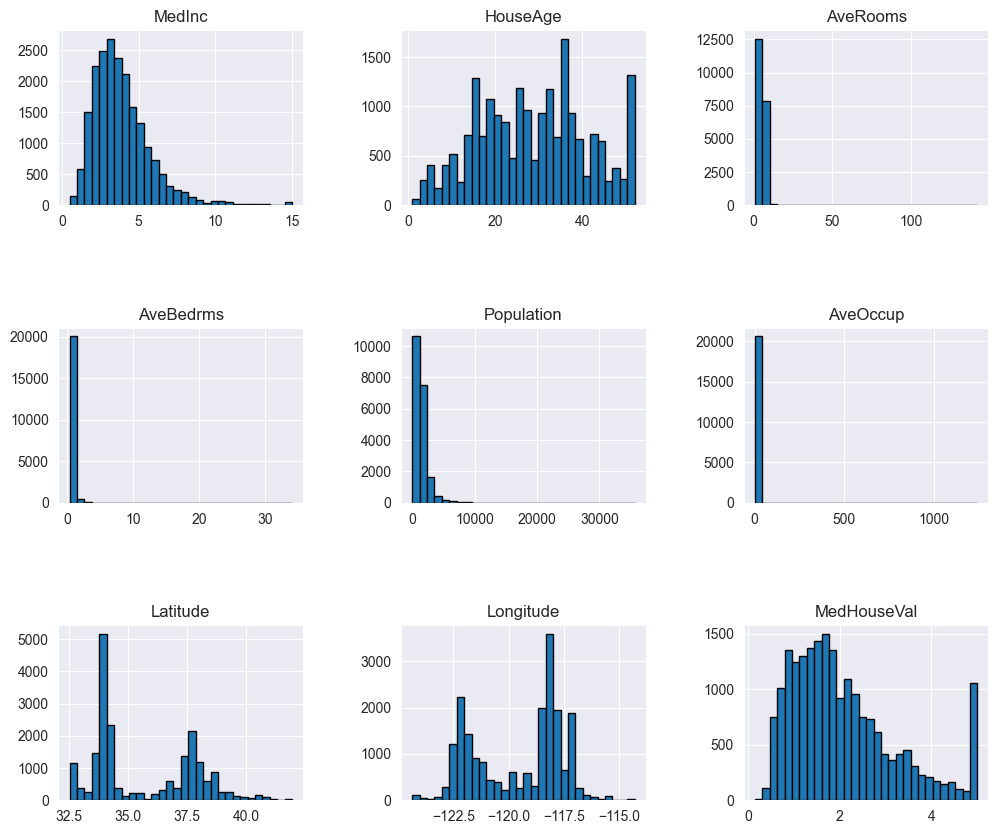

In [16]:
df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Let us visualize the geographical information in this dataset

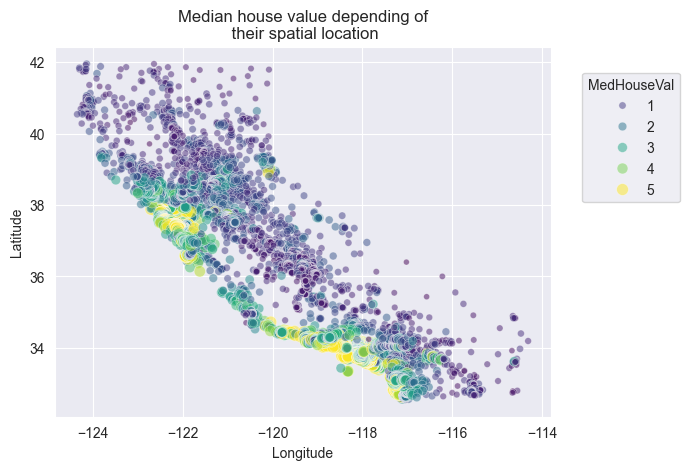

In [18]:
import seaborn as sns

sns.scatterplot(
      data = df,
      x='Longitude',
      y='Latitude',
      size='MedHouseVal',
      hue='MedHouseVal',
      palette='viridis',
      alpha=0.5,
)

plt.legend(
      title='MedHouseVal',
      bbox_to_anchor=(1.05, 0.95),
      loc="upper left"
)

_ = plt.title("Median house value depending of\n their spatial location")

We see that the high-valued houses are located along the coast of California - along the bigger cities like Los Angeles, San Diego, San Hose, San Fransisco

Let us take a random subset to have lesser data points to plot, where we could see these specificities.

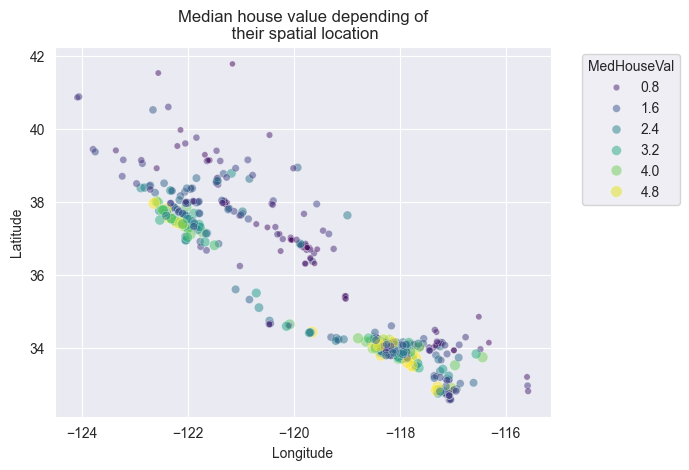

In [19]:
rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(df.shape[0]), size=500, replace=False
)

sns.scatterplot(
    data=df.iloc[indices],
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

Making pair plots of all the features and target, but dropping the latitude and longitude.

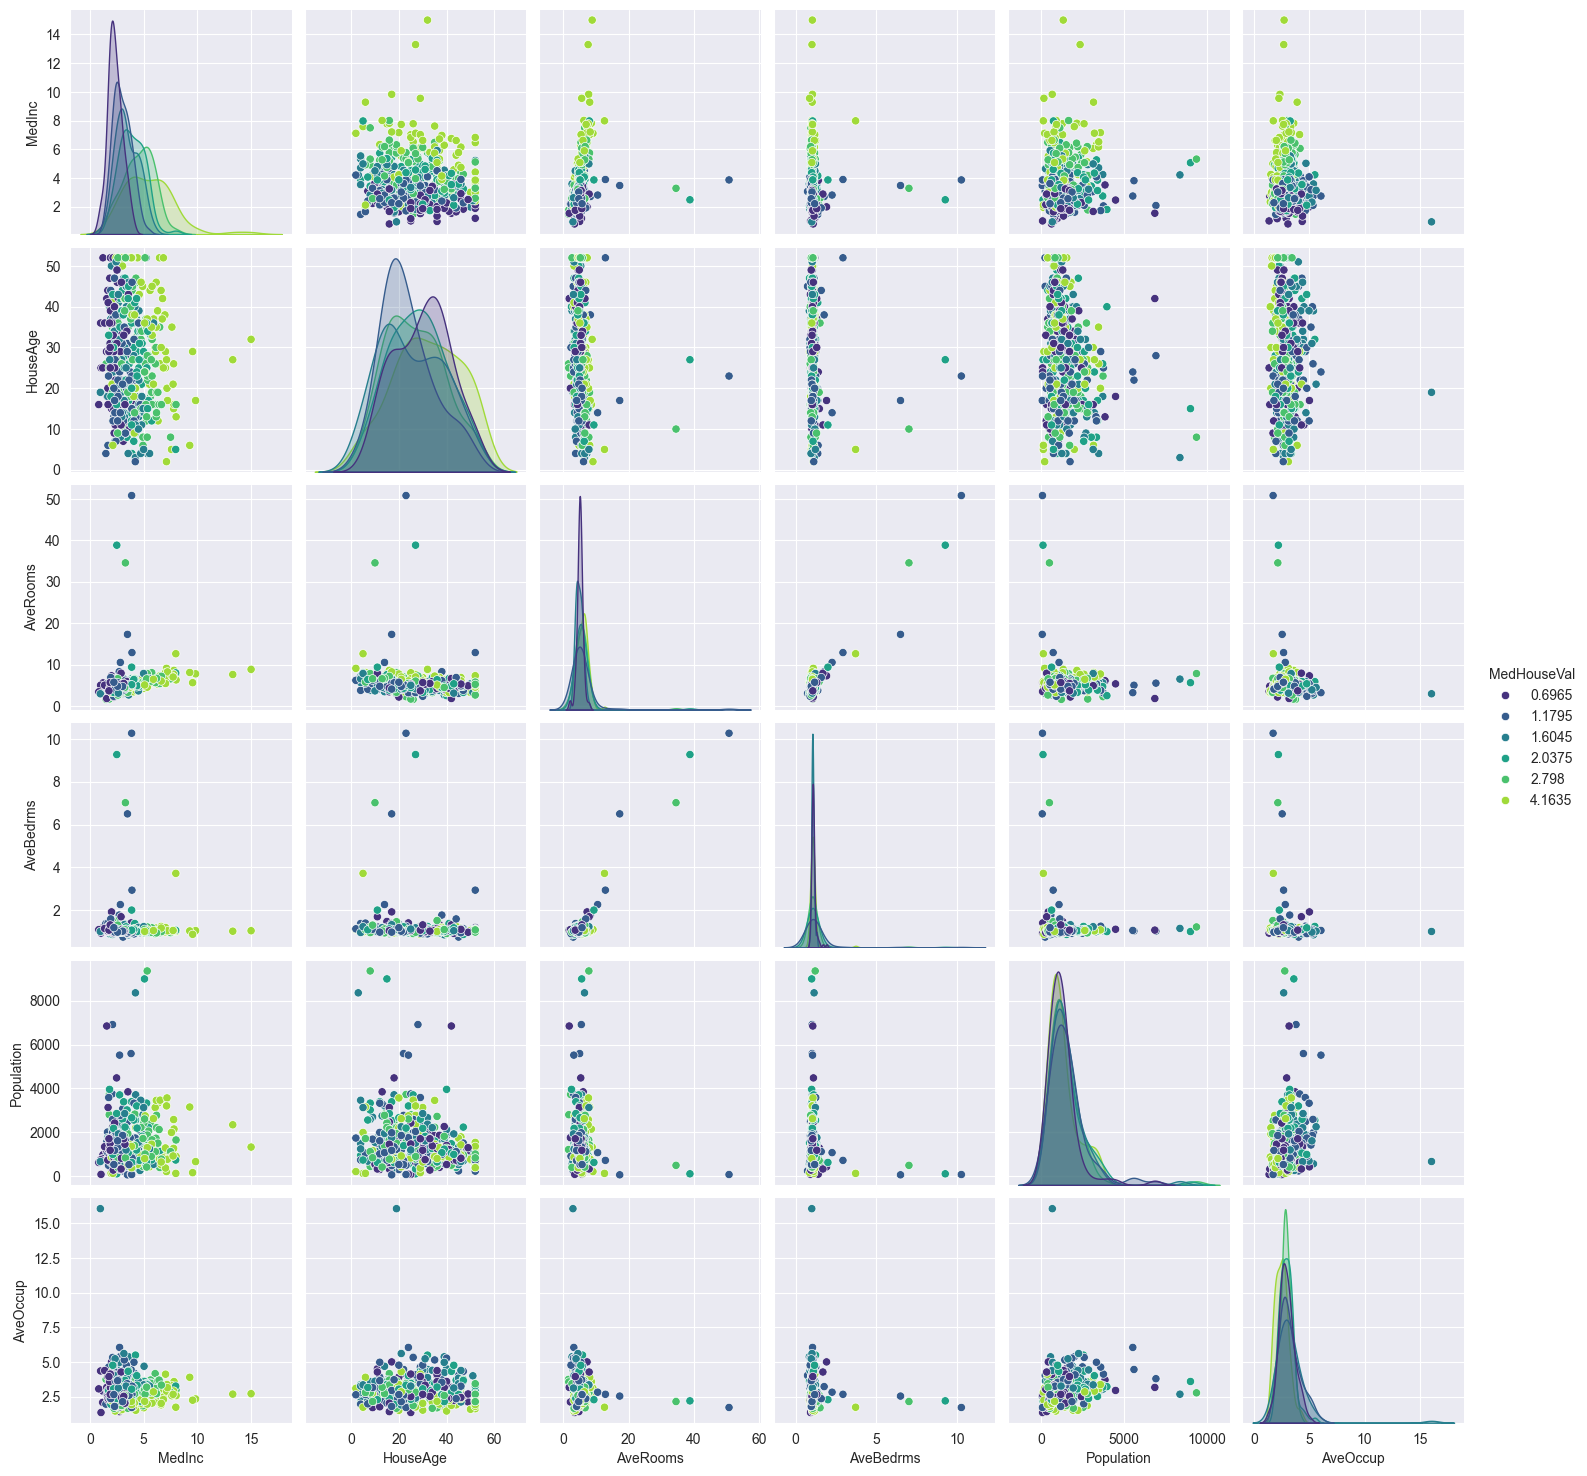

In [20]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = df.iloc[indices].drop(columns=columns_drop)

# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

Last but not the least, a correlation heatmap

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

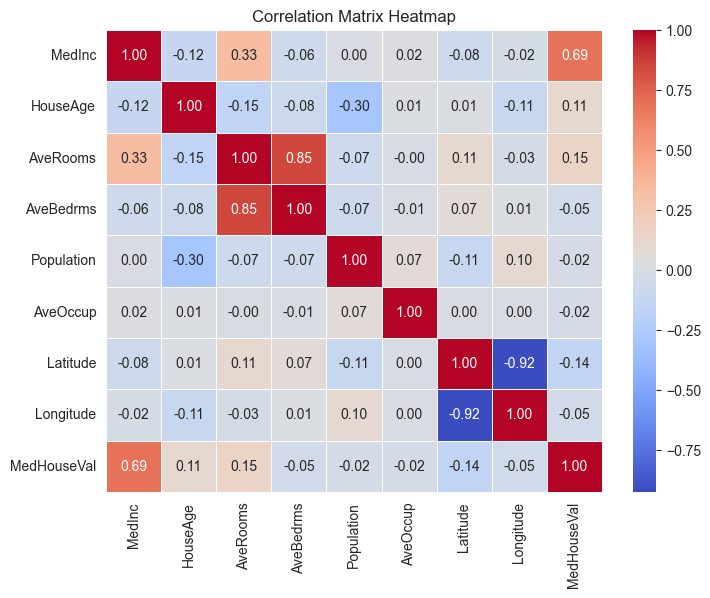

In [21]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)  # View correlation values

# Set the background style to white
sns.set_style("white")
sns.palette='viridis'

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

## What did I learn from this?

* To explore a big real-life dataset, like the one used above.
* To compare different machine learning models by comparing their scores and time taken.
* Data analysis is just as important as fitting the right machine learning models.